In [2]:
from mp_api.client import MPRester

d:\Universidad\Semestre 10\Minería de datos\Proyecto\Ambiente virtual\MPApi\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
api_key = "Dzhoeg8v6DxzxNhjhYjRosxnYIr5mT9i"

elements = ["Li","Mn","Ni","O"]
query_params = {"deprecated": False}

# Crea una instancia de MPRester con tu clave de API
with MPRester(api_key) as mpr:
    # Define la consulta de MongoDB para incluir solo los elementos deseado
    # Utiliza el método _search con la consulta de MongoDB
    results = mpr.materials.search(elements=elements)

print(len(results))


d:\Universidad\Semestre 10\Minería de datos\Proyecto\Ambiente virtual\MPApi\lib\site-packages\mp_api\client\mprester.py:192: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(
Retrieving MaterialsDoc documents: 100%|██████████| 128/128 [00:00<?, ?it/s]

128


In [4]:
from pymatgen.core import Element

# Lista de símbolos de elementos
simbolos_elementos = ["Li", "Mn", "Ni", "O"]

# Crea objetos Element a partir de los símbolos de elementos
elementos = [Element(element) for element in simbolos_elementos]

filtered_results = [material for material in results if set(material.elements)==set(elementos)]
filtered_results = [material for material in filtered_results if material.composition.get_atomic_fraction(Element("O"))/material.composition.get_atomic_fraction(Element("Li")) == 4.0]

In [5]:
def x_prop(material):
    # Calcula la proporcion de Mn y Ni de LNMO
    # LiNixMn2-xO4
    x = 2*material.composition.get_atomic_fraction(Element("Ni"))/(material.composition.get_atomic_fraction(Element("Ni"))+material.composition.get_atomic_fraction(Element("Mn")))
    return x

filtered_results = [material for material in filtered_results if 0 < x_prop(material) < 2]

for i in range(len(filtered_results)):
    print(filtered_results[i].formula_pretty)

mp = [filtered_results[i].material_id for i in range(len(filtered_results))]
mp

# LNMO_ids = [material]

Li8Mn15NiO32
Li2Mn3NiO8
Li2Mn3NiO8
Li2Mn3NiO8
Li2Mn3NiO8
Li2Mn3NiO8
Li2Mn3NiO8
Li2Mn3NiO8
LiMnNiO4
Li2MnNi3O8
Li2MnNi3O8
Li2MnNi3O8
Li4Mn5Ni3O16
Li2MnNi3O8
Li2MnNi3O8
Li3Mn5(NiO6)2
Li3Mn2Ni5O12


[MPID(mp-772976),
 MPID(mp-753229),
 MPID(mp-769631),
 MPID(mp-1177919),
 MPID(mp-775284),
 MPID(mp-775319),
 MPID(mp-771112),
 MPID(mp-771971),
 MPID(mp-756366),
 MPID(mp-752530),
 MPID(mp-1400982),
 MPID(mp-758714),
 MPID(mp-756534),
 MPID(mp-756193),
 MPID(mp-774906),
 MPID(mp-758709),
 MPID(mp-758846)]

In [6]:
with MPRester(api_key) as mpr:
    results = mpr.materials.thermo.search(material_ids = mp)

Retrieving ThermoDoc documents: 100%|██████████| 34/34 [00:00<?, ?it/s]


In [7]:
results = [results[2*i+1] for i in range(int(len(results)/2))]

In [8]:
def obtener_id(object):
    return object.material_id

# Ordena ambas listas en función del atributo "id"
results_mat = sorted(filtered_results, key=obtener_id)
results_therm = sorted(results, key=obtener_id)

# Ahora ambas listas están ordenadas de la misma manera según el atributo "id"
print([results.material_id for results in results_mat])
print([results.material_id for results in results_therm])

print(results_mat[0])

[MPID(mp-752530), MPID(mp-753229), MPID(mp-756193), MPID(mp-756366), MPID(mp-756534), MPID(mp-758709), MPID(mp-758714), MPID(mp-758846), MPID(mp-769631), MPID(mp-771112), MPID(mp-771971), MPID(mp-772976), MPID(mp-774906), MPID(mp-775284), MPID(mp-775319), MPID(mp-1177919), MPID(mp-1400982)]
[MPID(mp-752530), MPID(mp-753229), MPID(mp-756193), MPID(mp-756366), MPID(mp-756534), MPID(mp-758709), MPID(mp-758714), MPID(mp-758846), MPID(mp-769631), MPID(mp-771112), MPID(mp-771971), MPID(mp-772976), MPID(mp-774906), MPID(mp-775284), MPID(mp-775319), MPID(mp-1177919), MPID(mp-1400982)]
MPDataDoc<MaterialsDoc>
builder_meta=EmmetMeta(emmet_version='0.37.0', pymatgen_version='2022.4.19', pull_request=825, database_version='2022.10.28', build_date=datetime.datetime(2022, 10, 19, 1, 23, 47, 65000)),
nsites=14,
elements=[Element Li, Element Mn, Element Ni, Element O],
nelements=4,
composition=Composition('Li2 Mn1 Ni3 O8'),
composition_reduced=Composition('Li2 Mn1 Ni3 O8'),
formula_pretty='Li2MnNi3O8'

[1.  0.5]
[1.5        0.5        1.5        0.75       0.57142857 1.5
 1.42857143 0.5        0.5        0.125      1.5        0.5
 0.5        0.5        1.5       ]
[-1.70721094 -1.94819464]
[-1.41117507 -1.87575004 -1.44115112 -1.76970958 -1.86442785 -1.40539807
 -1.52355863 -1.93639748 -1.90422406 -2.03176771 -1.44915259 -1.88166151
 -1.87457943 -1.89784608  1.7179651 ]


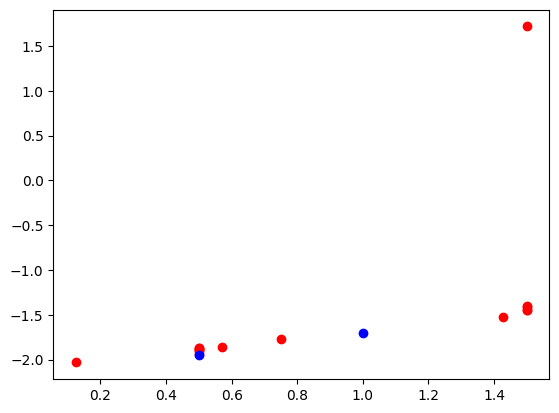

In [9]:
import matplotlib.pyplot as plt
import numpy as np

x_stable = np.array([x_prop(results_mat[i]) for i in range(len(results_mat)) if results_therm[i].is_stable])
x_unstable = np.array([x_prop(results_mat[i]) for i in range(len(results_mat)) if not results_therm[i].is_stable])

print(x_stable)
print(x_unstable)

y_stable = np.array([results_therm[i].formation_energy_per_atom for i in range(len(results_mat)) if results_therm[i].is_stable])
y_unstable = np.array([results_therm[i].formation_energy_per_atom for i in range(len(results_mat)) if not results_therm[i].is_stable])

print(y_stable)
print(y_unstable)

# 
plt.figure(0)
plt.scatter(x_unstable,y_unstable, color="red")
plt.scatter(x_stable,y_stable, color="blue")
plt.show()